In [1]:
import pandas as pd

def read_data_as_dict(filename):
    with open(filename) as f:
        data = f.read()
        data = data.split('\n\n')
        data = [ d.split('\n') for d in data ]
    
    for measurement in data:
        m = dict()
        for line in measurement:
            if not line: continue
            key, value = line.split(":", 1)
            m[key.strip()] = value.strip()
            
        yield m

def read_data(filename):
    data = pd.DataFrame(list(read_data_as_dict(filename)))
    data = data.dropna().set_index("Message size [Byte]")
    data = data.convert_objects(convert_dates='coerce', convert_numeric=True)
    return data

In [2]:
netio = read_data("results_netio.txt")
netio_rds = read_data("results_netio_realds.txt")
netio_t4 = read_data("results_netio_t4.txt")
zeromq = read_data("results_zeromq.txt")
zeromq_t4 = read_data("results_zeromq_t4.txt")

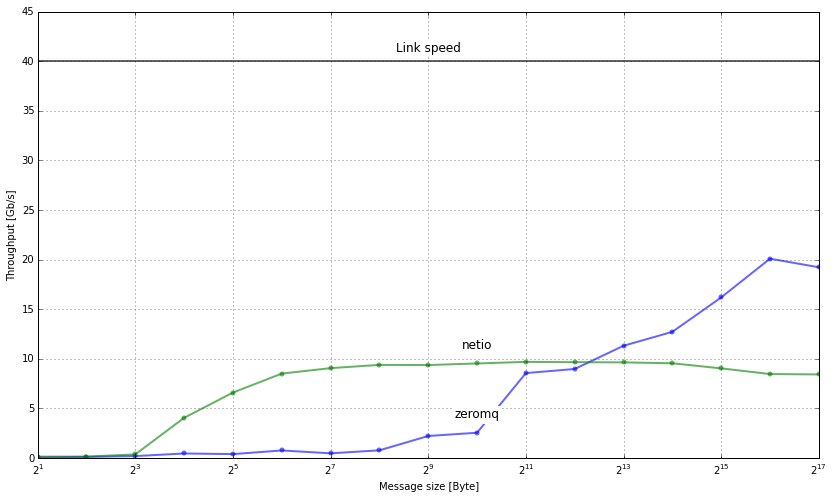

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_data(data, name):
    plt.plot(data.index, data["Throughput [Gb/s]"], "o-", label=name, lw=2, markersize=5, markeredgewidth=0, alpha=.6)
    plt.gca().set_xscale('log', basex=2)
    plt.ylim((0, 45))
    X = 9
    xy = (data.index[X], data["Throughput [Gb/s]"][X])
    xytext = (xy[0], xy[1] + 1.5)
    plt.annotate(name, xy=xy, xytext=xytext, ha='center', fontsize=12, backgroundcolor='white')
    plt.xlabel("Message size [Byte]")
    plt.ylabel("Throughput [Gb/s]")

plt.figure(figsize=(14,8))

plot_data(zeromq, 'zeromq')
#plot_data(netio, 'netio')
plot_data(netio_rds, 'netio')


plt.plot([2, 2**17], [40, 40], '-', color='black', lw=2, alpha=.6)
plt.annotate("Link speed", xy=(2**9, 40), xytext=(2**9, 41), ha='center', fontsize=12, backgroundcolor='white')
plt.grid()
plt.savefig("single-threaded.png")

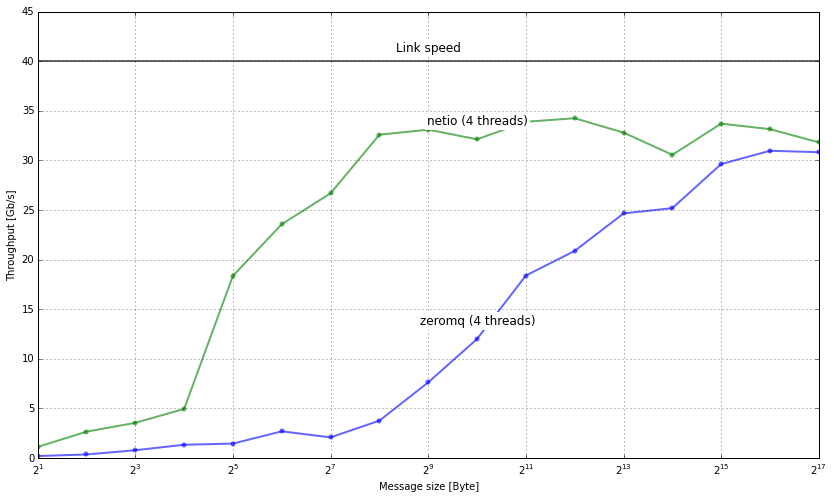

In [4]:
plt.figure(figsize=(14,8))

plot_data(zeromq_t4, 'zeromq (4 threads)')
plot_data(netio_t4, 'netio (4 threads)')

plt.plot([2, 2**17], [40, 40], '-', color='black', lw=2, alpha=.6)
plt.annotate("Link speed", xy=(2**9, 40), xytext=(2**9, 41), ha='center', fontsize=12, backgroundcolor='white')
plt.grid()
plt.savefig('multi-threaded.png')